<a href="https://www.kaggle.com/code/romaneyvazov/titanic-v5-eda-different-models-0-7799?scriptVersionId=279576789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Первый взгляд на данные

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()
print('-' * 100)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtyp

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# пропуски есть
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# дубликатов нет
df_train.duplicated().sum()

0

In [11]:
df_test.duplicated().sum()

0

# 2. EDA и первичная обработка данных

In [12]:
# посмотрим на целевую переменную
# классы целевой переменной относительно сбалансированы
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
# признаки PassengerId и Ticket вряд ли несут полезную информацию, удалим их
df_train.drop(columns=['PassengerId', 'Ticket'], inplace=True)
df_test.drop(columns=['PassengerId', 'Ticket'], inplace=True)

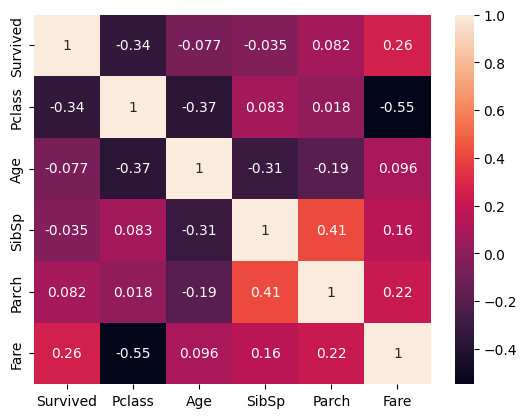

In [14]:
# оценим корреляцию между числовыми признаками
sns.heatmap(df_train.corr(numeric_only=True), annot=True);
# существенной корреляции целевой переменной с другими не наблюдается
# сильной корреляции между различными признаками тоже нет

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

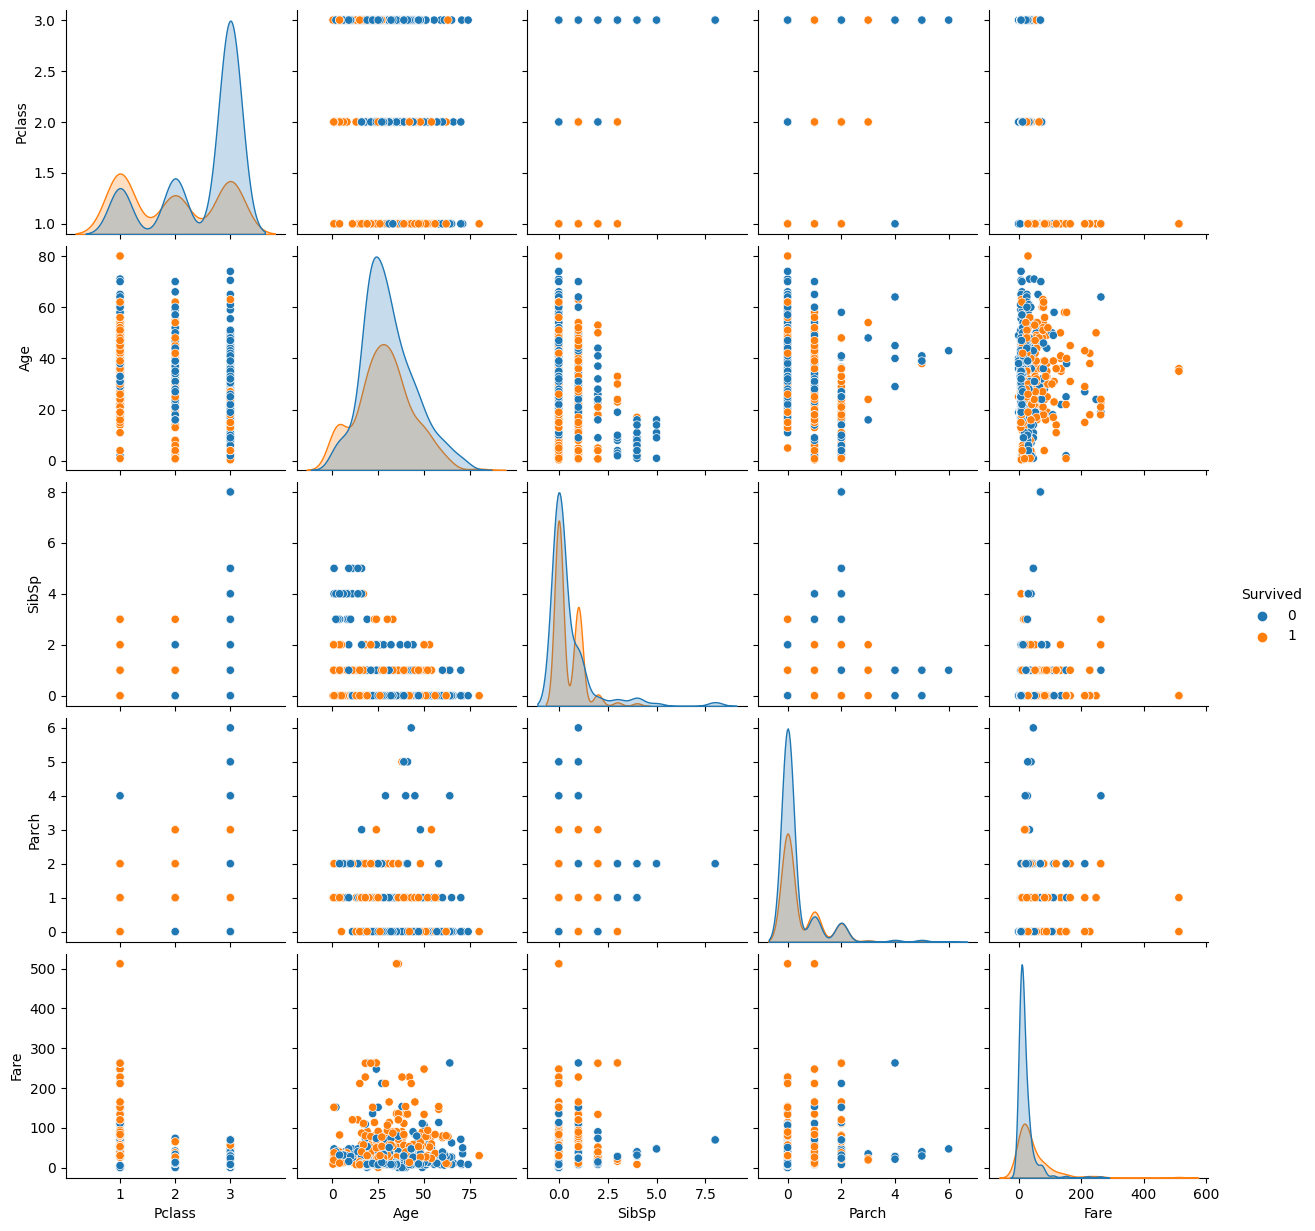

In [15]:
# оценим связь числовых переменных
sns.pairplot(data=df_train, hue='Survived');

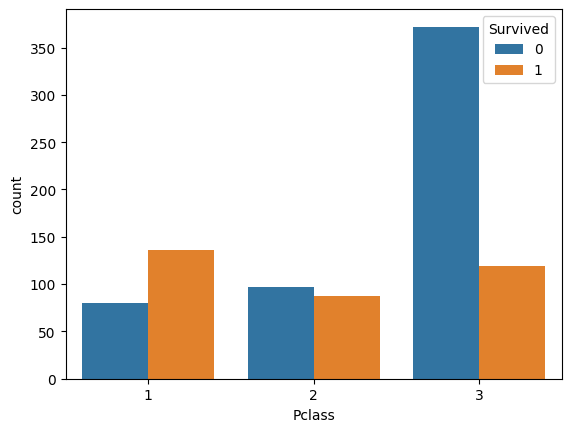

In [16]:
sns.countplot(x='Pclass', data=df_train, hue='Survived');
# выживаемость зависит от класса билета

In [17]:
# из признака Name теоретически можно извлечь титул или еще что-то, но не будем этим заниматься и удалим его
df_train.drop(columns=['Name'], inplace=True)
df_test.drop(columns=['Name'], inplace=True)

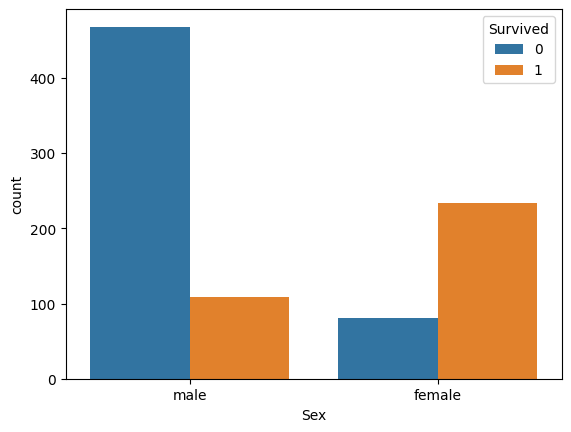

In [18]:
sns.countplot(x='Sex', data=df_train, hue='Survived');
# выживаемость зависит от пола

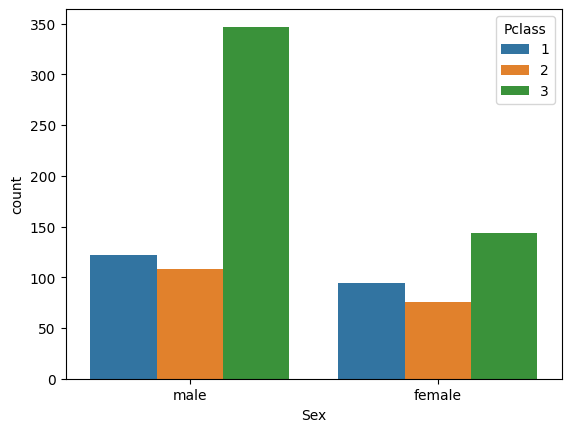

In [19]:
sns.countplot(x='Sex', data=df_train, hue='Pclass');
# мужчины в основном были в 3 классе

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


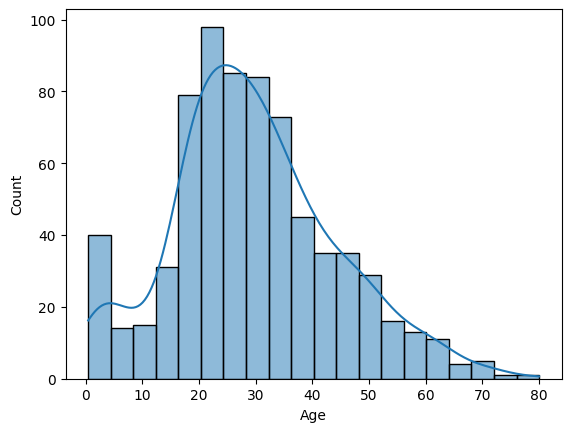

In [20]:
# посмотрим на распределение возрастов
sns.histplot(x='Age', data=df_train, kde=True);
# стариков больше, чем детей

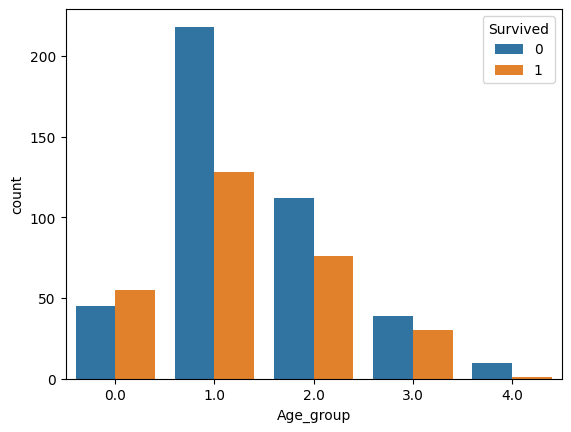

In [21]:
# преобразуем Age в диапазон возрастов
# labels=False возвращает только целочисленные индикаторы
# разбиение для bins=5 показывает, что в самой молодой группе выживших больше, чем погибших, оставим его
df_train['Age_group'] = pd.cut(df_train['Age'], bins=5, labels=False)
sns.countplot(x='Age_group', data=df_train, hue='Survived');

In [22]:
# посмотрим, на какие возрастные группы делается разбиение при bins=5
pd.cut(df_train['Age'], bins=5).value_counts()

Age
(16.336, 32.252]    346
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64

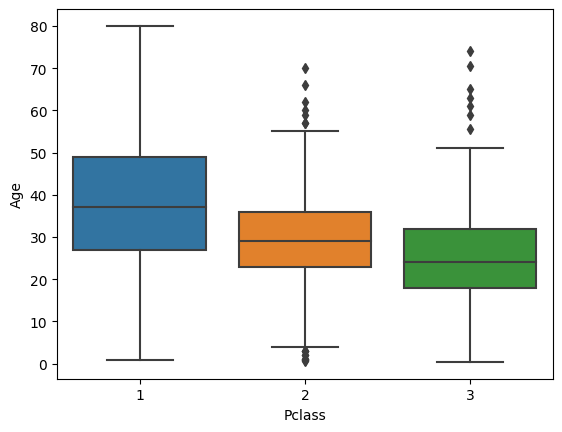

In [23]:
sns.boxplot(x='Pclass', y='Age', data=df_train);
# чем выше класс, тем выше возраст пассажиров (медианный)

In [24]:
# сделаем один признак Relatives как сумму SibSp и Parch, старые признаки удалим
df_train['Relatives'] = df_train['SibSp'] + df_train['Parch']
df_test['Relatives'] = df_test['SibSp'] + df_test['Parch']

df_train.drop(columns=['SibSp', 'Parch'], inplace=True)
df_test.drop(columns=['SibSp', 'Parch'], inplace=True)

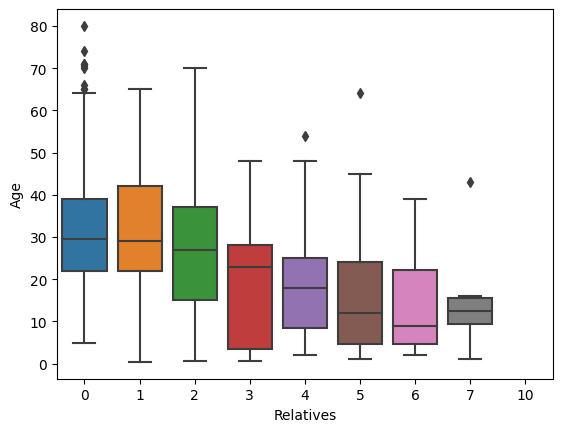

In [25]:
sns.boxplot(x='Relatives', y='Age', data=df_train);
# чем больше родственников, тем ниже возраст пассажиров (медианный)

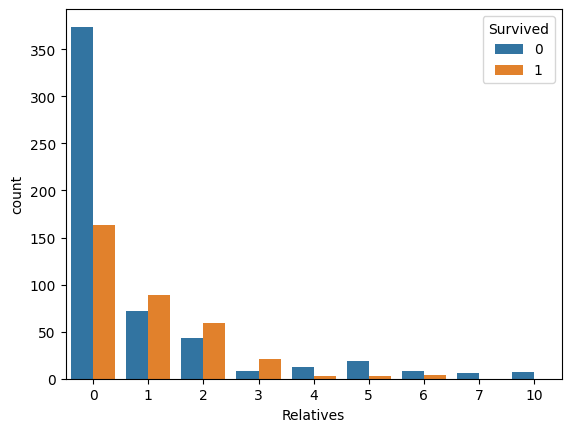

In [26]:
sns.countplot(x='Relatives', data=df_train, hue='Survived');

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


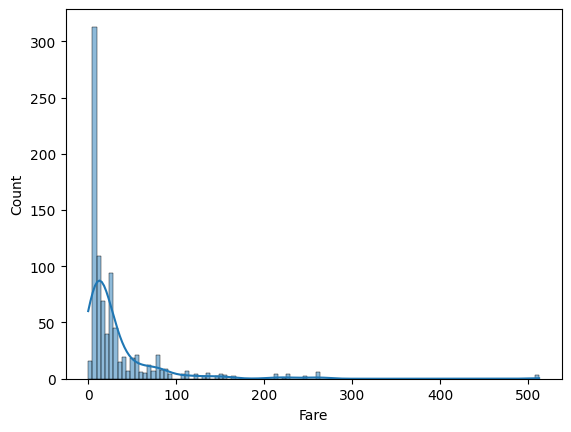

In [27]:
sns.histplot(x='Fare', data=df_train, kde=True);

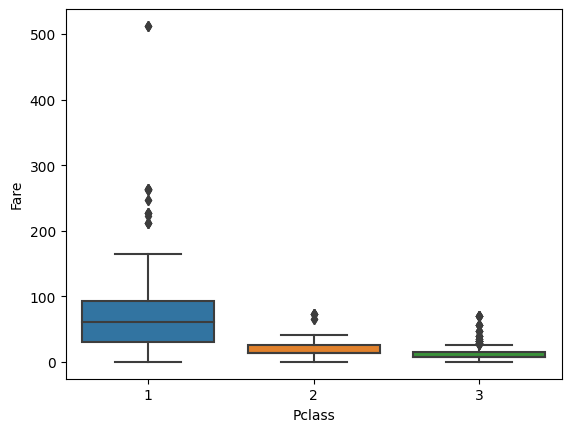

In [28]:
sns.boxplot(x='Pclass', y='Fare', data=df_train);
# большой разброс цен на билеты 1 класса

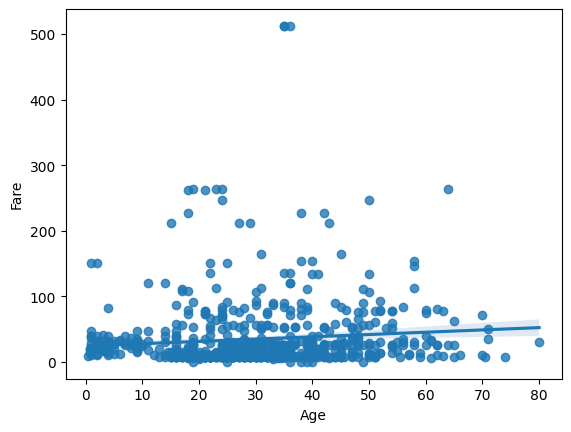

In [29]:
sns.regplot(x='Age', y='Fare', data=df_train);
# корреляция между ценой билета и возрастом довольно слабая

In [30]:
# признак Cabin содержит названия палуб (первые буквы), но в нем очень много пропусков
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
# создадим новый признак с названиями палуб из столбца Cabin
df_train['Deck'] = df_train['Cabin'].str[0]
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Age_group,Relatives,Deck
0,0,3,male,22.0,7.2500,NaN,S,1.0,1,NaN
1,1,1,female,38.0,71.2833,C85,C,2.0,1,C
2,1,3,female,26.0,7.9250,NaN,S,1.0,0,NaN
3,1,1,female,35.0,53.1000,C123,S,2.0,1,C
4,0,3,male,35.0,8.0500,NaN,S,2.0,0,NaN


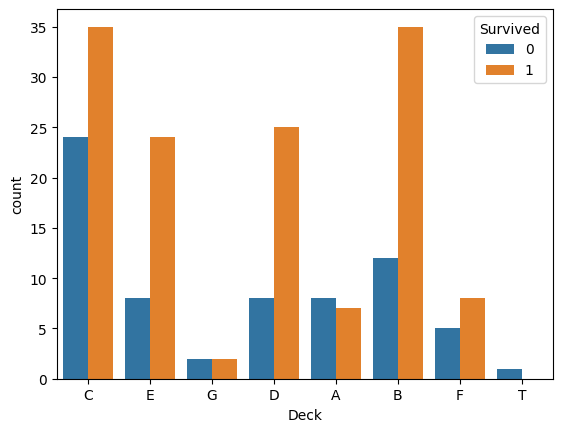

In [32]:
sns.countplot(x='Deck', data=df_train, hue='Survived');
# вряд ли получится извлечь много пользы от этого, к тому же много пропусков, поэтому удалим и Cabin, и Deck

In [33]:
df_train.drop(columns=['Cabin', 'Deck'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

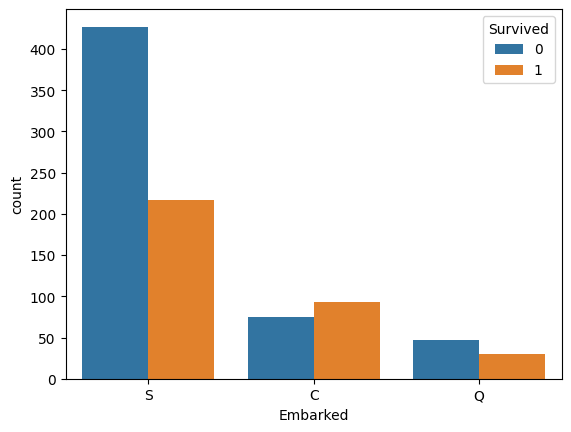

In [34]:
sns.countplot(x='Embarked', data=df_train, hue='Survived');
# пассажиры из порта C выживали чаще, чем погибали, возможно, это связано с их расположением на корабле

In [35]:
# удалим ранее созданный признак Age_group из train
df_train.drop(columns='Age_group', inplace=True)

**Выводы**

Очевидно, что признаки 'Pclass', 'Sex', 'Age' оказывают существенное влияние на целевую переменную

# 3. Обработка данных

In [36]:
# разделим данные на признаки и таргет
X_train = df_train.drop(columns='Survived')
y_train = df_train['Survived']
X_test = df_test

**3.1 Обработка пропусков**

В train - пропуски в столбцах Age и Embarked, в test - в Age и Fare

In [37]:
# для заполнения пропусков Age как в числовом признаке используем KNNImputer
# т.к. используется метрический метод, данные нужно сначала нормализовать
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# создадим датафреймы только с интересующими нас признаками
X_train_knn = X_train.copy()[['Pclass','Age', 'Fare']] 
X_test_knn = X_test.copy()[['Pclass','Age', 'Fare']]

# нормализуем данные - обучаем StandardScaler на train, применяем его же на test
scaler_knn = StandardScaler()
X_train_knn = pd.DataFrame(scaler_knn.fit_transform(X_train_knn), columns=X_train_knn.columns)
X_test_knn = pd.DataFrame(scaler_knn.transform(X_test_knn), columns=X_test_knn.columns)

X_train_knn.head()

,Pclass,Age,Fare
0,0.827377,-0.530377,-0.502445
1,-1.566107,0.571831,0.786845
2,0.827377,-0.254825,-0.488854
3,-1.566107,0.365167,0.420730
4,0.827377,0.365167,-0.486337


In [38]:
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

# обучаем KNNImputer на train, далее применяем его к test (чтобы избежать утечки данных)
X_train_knn = pd.DataFrame(knn_imputer.fit_transform(X_train_knn), columns=X_train_knn.columns)
X_test_knn = pd.DataFrame(knn_imputer.transform(X_test_knn), columns=X_test_knn.columns)

In [39]:
# вернем исходный масштаб данных
X_train_knn = pd.DataFrame(scaler_knn.inverse_transform(X_train_knn), columns=X_train_knn.columns)
X_test_knn = pd.DataFrame(scaler_knn.inverse_transform(X_test_knn), columns=X_test_knn.columns)

X_train_knn.head()

,Pclass,Age,Fare
0,3.0,22.0,7.2500
1,1.0,38.0,71.2833
2,3.0,26.0,7.9250
3,1.0,35.0,53.1000
4,3.0,35.0,8.0500


In [40]:
# подставим заполненные значения в исходные датафреймы
mask_train = X_train['Age'].isnull()
mask_test = X_test['Age'].isnull()
X_train.loc[mask_train, 'Age'] = X_train_knn.loc[mask_train]
X_test.loc[mask_test, 'Age'] = X_test_knn.loc[mask_test]

In [41]:
# также для заполнения пропусков в Age можно применить следующий подход
"""
# для заполнения Age сгруппируем людей по Pclass и возьмем медиану в каждой группе
median_ages_by_class = X_train.groupby('Pclass')['Age'].median()

def Age_filler(x):
    if pd.isna(x['Age']):
        return median_ages_by_class[x['Pclass']]
    return x['Age']


# мы применяем функцию по столбцам - т.е. в Age_filler передается серия, состоящая из одной строки датафрейма
X_train['Age'] = X_train.apply(Age_filler, axis=1)
X_test['Age'] = X_test.apply(Age_filler, axis=1)
"""

"\n# для заполнения Age сгруппируем людей по Pclass и возьмем медиану в каждой группе\nmedian_ages_by_class = X_train.groupby('Pclass')['Age'].median()\n\ndef Age_filler(x):\n    if pd.isna(x['Age']):\n        return median_ages_by_class[x['Pclass']]\n    return x['Age']\n\n\n# мы применяем функцию по столбцам - т.е. в Age_filler передается серия, состоящая из одной строки датафрейма\nX_train['Age'] = X_train.apply(Age_filler, axis=1)\nX_test['Age'] = X_test.apply(Age_filler, axis=1)\n"

In [42]:
# пропуски в Embarked и Fare заполним модой и медианой соответственно
# мы не нарушаем принципа разделения данных, поскольку меняем test так же, как train
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)

/tmp/ipykernel_19/2640344818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_19/2640344818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [43]:
# пропусков теперь нет
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(0, 0)

**3.2 Работа с выбросами**

In [44]:
# числовые признаки, для которых есть смысл смотреть выбросы - это Age и Fare
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [45]:
# посмотрим, какой процент от всех данных составляют выбросы
outliers_features = ['Age', 'Fare']
def outlier_count(X):
    Q25, Q75 = X.quantile(0.25, axis=0), X.quantile(0.75, axis=0)
    IQR = Q75 - Q25
    lower_bound, upper_bound = Q25 - 1.5 * IQR, Q75 + 1.5 * IQR
    quantity = ((X >= upper_bound) | (X <= lower_bound)).sum(axis=0) / X.shape[0] * 100 # доля выбросов для каждого признака в процентах
    return quantity.sort_values(ascending=False)


outlier_count(X_train[outliers_features])
# достаточно большое число выбросов в признаке Fare
# пока оставим, как есть

Fare    13.019080
Age      2.132435
dtype: float64

**3.3 Кодирование категориальных переменных**

Общие соображения:
1. Удобный инструмент category_encoders как будто не может удалить один лишний столбец, наличие которого может приводить к мультиколлинеарности (либо я не нашел способ это сделать). При этом если в test появляются новые данные, то обученный на train category_encoders может присваивать им нулевые значения, как и должно быть (задается через handle_unknown='value' - значение по умолчанию).
2. Метод pandas.get_dummies не «запоминает» категории при обучении - т.е. если значения в train и test будут отличаться, появится ошибка.

Исходя из этого, применим OneHotEncoder, в котором можно указать параметр handle_unknown='ignore'. В этом случае при обнаружении неизвестной категории во время преобразования столбец будет содержать все нули. Также через drop='first' удаляем первый (избыточный) признак

In [46]:
# необходимо закодировать признаки Pclass, Sex и Embarked
# спорный вопрос, стоит ли кодировать Pclass - с одной стороны, у нас нет уверенности, что первый класс в 2 раза лучше второго и т.д.
# с другой - при кодировании мы теряем информацию о разнице между классами
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(drop='first', sparse_output = False, handle_unknown='ignore') # удаляем первый (избыточный) признак через drop='first'
encoded_X_train = pd.DataFrame(onehotencoder.fit_transform(X_train[['Pclass', 'Sex', 'Embarked']])) # нужно передавать двумерный массив
encoded_X_train.columns = onehotencoder.get_feature_names_out() # добавляем названия столбцов через метод get_feature_names_out

X_train = X_train.join(encoded_X_train) # присоединим новые признаки к исходному датафрейму
X_train.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True) # удалим исходные признаки

X_train

,Age,Fare,Relatives,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,7.2500,1,0.0,1.0,1.0,0.0,1.0
1,38.0,71.2833,1,0.0,0.0,0.0,0.0,0.0
2,26.0,7.9250,0,0.0,1.0,0.0,0.0,1.0
3,35.0,53.1000,1,0.0,0.0,0.0,0.0,1.0
4,35.0,8.0500,0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1.0,0.0,1.0,0.0,1.0
887,19.0,30.0000,0,0.0,0.0,0.0,0.0,1.0
888,27.8,23.4500,3,0.0,1.0,0.0,0.0,1.0
889,26.0,30.0000,0,0.0,0.0,1.0,0.0,0.0


In [47]:
# то же самое для test
encoded_X_test = pd.DataFrame(onehotencoder.transform(df_test[['Pclass', 'Sex', 'Embarked']]))
encoded_X_test.columns = onehotencoder.get_feature_names_out()

X_test = df_test.join(encoded_X_test)
X_test.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

X_test

,Age,Fare,Relatives,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0.0,1.0,1.0,1.0,0.0
1,47.0,7.0000,1,0.0,1.0,0.0,0.0,1.0
2,62.0,9.6875,0,1.0,0.0,1.0,1.0,0.0
3,27.0,8.6625,0,0.0,1.0,1.0,0.0,1.0
4,22.0,12.2875,2,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
413,30.1,8.0500,0,0.0,1.0,1.0,0.0,1.0
414,39.0,108.9000,0,0.0,0.0,0.0,0.0,0.0
415,38.5,7.2500,0,0.0,1.0,1.0,0.0,1.0
416,30.1,8.0500,0,0.0,1.0,1.0,0.0,1.0


In [48]:
"""
# вариант через библиотеку category_encoders
import category_encoders as ce

# в параметр cols передадим столбцы, которые нужно преобразовать
# в метод .fit_transform() передадим весь датафрейм целиком
# старые столбцы автоматически удаляются
ohe_encoder = ce.OneHotEncoder(cols=['Pclass', 'Sex', 'Embarked'])
X_train = ohe_encoder.fit_transform(X_train)
"""

"\n# вариант через библиотеку category_encoders\nimport category_encoders as ce\n\n# в параметр cols передадим столбцы, которые нужно преобразовать\n# в метод .fit_transform() передадим весь датафрейм целиком\n# старые столбцы автоматически удаляются\nohe_encoder = ce.OneHotEncoder(cols=['Pclass', 'Sex', 'Embarked'])\nX_train = ohe_encoder.fit_transform(X_train)\n"

**3.4 Масштабирование и преобразование числовых признаков**

Необходимо нормализовать числовые признаки, используем для этого StandardScaler. Нет смысла масштабировать категориальные (булевы) признаки - это может необоснованно увеличить или уменьшить их интервал значений.
Соответственно, работаем только с числовыми признаками 'Age', 'Fare', 'Relatives'

In [49]:
# сначала посмотрим, насколько числовые признаки близки к нормальному распределению
from scipy.stats import kstest, shapiro, skew 

num_features = ['Age', 'Fare', 'Relatives']
def norm_distr_check(X):
    df_norm_distr = pd.DataFrame(columns=['Критерий Колмогорова-Смирнова (p-value)', 
                                          'Критерий Шапиро-Уилка (p-value)', 
                                          'Коэффициент асимметрии']
                                            ) # пустой фрейм под результаты
    for col in X.columns:
        df_norm_distr.loc[col, 'Критерий Колмогорова-Смирнова (p-value)'] = kstest(X[col], 'norm').pvalue
        df_norm_distr.loc[col, 'Критерий Шапиро-Уилка (p-value)'] = shapiro(X[col]).pvalue
        df_norm_distr.loc[col, 'Коэффициент асимметрии'] = skew(X[col])
        
    return df_norm_distr


norm_distr_check(X_train[num_features])
# можно сделать вывод, что числовые признаки имеют отличное от нормального распределение
# в данном случае менять форму распределения не будем

,Критерий Колмогорова-Смирнова (p-value),Критерий Шапиро-Уилка (p-value),Коэффициент асимметрии
Age,0.0,0.0,0.404723
Fare,0.0,0.0,4.779253
Relatives,0.0,0.0,2.722848


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


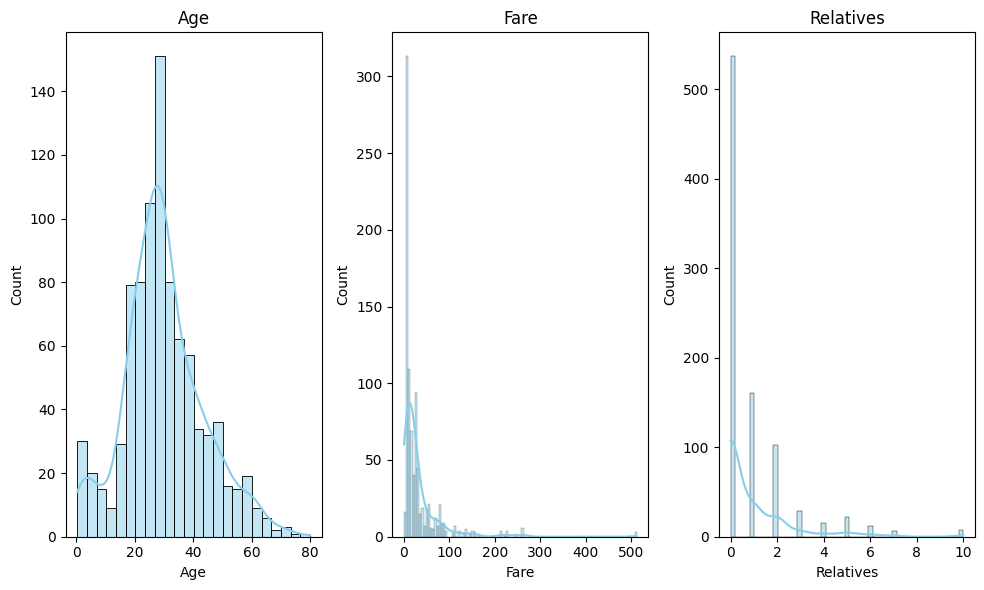

In [50]:
# оценим распределения числовых признаков визуально
def feature_vis(X):
    n_cols = X.shape[-1]
    fig, ax = plt.subplots(1, n_cols, figsize=(10, 6))
    ax = ax.flatten() # делаем массив осей одномерным

    for i, col in enumerate(X.columns):
        sns.histplot(X[col], ax=ax[i], kde=True, color="skyblue")
        ax[i].set_title(col)

    plt.tight_layout()

feature_vis(X_train[num_features])

In [51]:
# попробем оставить признак Pclass в первоначальном виде (без кодирования)
# эту ячейку можно закомментировать, тогда признак будет кодироваться
X_train['Pclass'] = pd.read_csv('/kaggle/input/titanic/train.csv')['Pclass']
X_train = X_train.drop(columns=['Pclass_2', 'Pclass_3'])
X_test['Pclass'] = pd.read_csv('/kaggle/input/titanic/test.csv')['Pclass']
X_test = X_test.drop(columns=['Pclass_2', 'Pclass_3'])

X_test

,Age,Fare,Relatives,Sex_male,Embarked_Q,Embarked_S,Pclass
0,34.5,7.8292,0,1.0,1.0,0.0,3
1,47.0,7.0000,1,0.0,0.0,1.0,3
2,62.0,9.6875,0,1.0,1.0,0.0,2
3,27.0,8.6625,0,1.0,0.0,1.0,3
4,22.0,12.2875,2,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...
413,30.1,8.0500,0,1.0,0.0,1.0,3
414,39.0,108.9000,0,0.0,0.0,0.0,1
415,38.5,7.2500,0,1.0,0.0,1.0,3
416,30.1,8.0500,0,1.0,0.0,1.0,3


In [52]:
from sklearn.preprocessing import StandardScaler

scaled_features = ['Age', 'Fare', 'Relatives', 'Pclass'] # Pclass здесь указывается для варианта, когда он не кодируется
scaler = StandardScaler()
X_train_scaled = X_train.drop(columns=scaled_features).join(pd.DataFrame(scaler.fit_transform(X_train[scaled_features]), columns=scaled_features))
X_test_scaled = X_test.drop(columns=scaled_features).join(pd.DataFrame(scaler.transform(X_test[scaled_features]), columns=scaled_features))

In [53]:
X_train_scaled

,Sex_male,Embarked_Q,Embarked_S,Age,Fare,Relatives,Pclass
0,1.0,0.0,1.0,-0.592804,-0.502445,0.059160,0.827377
1,0.0,0.0,0.0,0.586554,0.786845,0.059160,-1.566107
2,0.0,0.0,1.0,-0.297964,-0.488854,-0.560975,0.827377
3,0.0,0.0,1.0,0.365425,0.420730,0.059160,-1.566107
4,1.0,0.0,1.0,0.365425,-0.486337,-0.560975,0.827377
...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,-0.224254,-0.386671,-0.560975,-0.369365
887,0.0,0.0,1.0,-0.813933,-0.044381,-0.560975,-1.566107
888,0.0,0.0,1.0,-0.165286,-0.176263,1.299429,0.827377
889,1.0,0.0,0.0,-0.297964,-0.044381,-0.560975,-1.566107


In [54]:
X_test_scaled

,Sex_male,Embarked_Q,Embarked_S,Age,Fare,Relatives,Pclass
0,1.0,1.0,0.0,0.328570,-0.490783,-0.560975,0.827377
1,0.0,0.0,1.0,1.249943,-0.507479,0.059160,0.827377
2,1.0,1.0,0.0,2.355591,-0.453367,-0.560975,-0.369365
3,1.0,0.0,1.0,-0.224254,-0.474005,-0.560975,0.827377
4,0.0,0.0,1.0,-0.592804,-0.401017,0.679295,0.827377
...,...,...,...,...,...,...,...
413,1.0,0.0,1.0,0.004246,-0.486337,-0.560975,0.827377
414,0.0,0.0,0.0,0.660264,1.544246,-0.560975,-1.566107
415,1.0,0.0,1.0,0.623409,-0.502445,-0.560975,0.827377
416,1.0,0.0,1.0,0.004246,-0.486337,-0.560975,0.827377


In [55]:
# финальная проверка на корректность данных
X_train_scaled.info()
print('-' * 100)
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_male    891 non-null    float64
 1   Embarked_Q  891 non-null    float64
 2   Embarked_S  891 non-null    float64
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Relatives   891 non-null    float64
 6   Pclass      891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_male    418 non-null    float64
 1   Embarked_Q  418 non-null    float64
 2   Embarked_S  418 non-null    float64
 3   Age         418 non-null    float64
 4   Fare        418 non-null    fl

In [56]:
X_train_scaled.isnull().sum().sum(), X_test_scaled.isnull().sum().sum()

(0, 0)

**3.5 Конструирование признаков**

В данном случае дополнительные признаки не создаются, ранее на этапе EDA был создан признак Relatives.

Попробуем применить PCA, чтобы оценить вклад признаков

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

# процент дисперсии, объясняемый каждым из выбранных компонентов (собств. числа ковариационной матрицы)
pca.explained_variance_ratio_

array([0.38126258, 0.2943612 , 0.14005928, 0.08112923, 0.05294725,
       0.04010721, 0.01013324])

# 4. Моделирование и оценка результата

**4.1 KNN**

In [58]:
import optuna
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier

scores = pd.DataFrame() # датафрейм под все модели

def objective(trial):
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    n_neighbors = trial.suggest_int('n_neighbors', 2, 15, step=1)
    knn_optuna = KNeighborsClassifier(weights=weights, n_neighbors=n_neighbors)
    score = cross_val_score(knn_optuna, X_train_scaled, y_train, cv=5).mean() # максимизируем одну метрику (в данном случае - accuracy)
    return score


def model_score(model):
    # здесь оценим все метрики классификации
    # переменная score возвращает словарь с результатами метрик
    score = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
    return {k: v.mean() for k, v in score.items()}


study = optuna.create_study(direction='maximize', study_name='KNN')
study.optimize(objective, n_trials=100)

knn_optuna_score = study.best_value
knn_optuna_params = study.best_params

scores.loc['KNN', 'Score'] = knn_optuna_score
scores.loc['KNN', 'Model_params'] = str([f'{k}: {v}' for k, v in knn_optuna_params.items()])

[I 2025-11-18 14:45:35,825] A new study created in memory with name: KNN
[I 2025-11-18 14:45:35,851] Trial 0 finished with value: 0.7553825874081979 and parameters: {'weights': 'distance', 'n_neighbors': 2}. Best is trial 0 with value: 0.7553825874081979.
[I 2025-11-18 14:45:35,877] Trial 1 finished with value: 0.7845332998556274 and parameters: {'weights': 'distance', 'n_neighbors': 8}. Best is trial 1 with value: 0.7845332998556274.
[I 2025-11-18 14:45:35,904] Trial 2 finished with value: 0.7845458539953549 and parameters: {'weights': 'distance', 'n_neighbors': 13}. Best is trial 2 with value: 0.7845458539953549.
[I 2025-11-18 14:45:35,929] Trial 3 finished with value: 0.7912811499591991 and parameters: {'weights': 'distance', 'n_neighbors': 6}. Best is trial 3 with value: 0.7912811499591991.
[I 2025-11-18 14:45:35,952] Trial 4 finished with value: 0.7800577490427468 and parameters: {'weights': 'distance', 'n_neighbors': 3}. Best is trial 3 with value: 0.7912811499591991.
[I 2025-11-

In [59]:
knn_optuna_params

{'weights': 'uniform', 'n_neighbors': 5}

In [60]:
knn = KNeighborsClassifier(weights='uniform', n_neighbors=5)
model_score(knn)

{'fit_time': 0.0019666194915771485,
 'score_time': 0.015770626068115235,
 'test_accuracy': 0.8036344234511329,
 'test_precision': 0.7652350634122301,
 'test_recall': 0.7135976129582268,
 'test_roc_auc': 0.85156166299424}

In [61]:
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
# в качестве индекса используем PassengerId из test
idx = pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId']
submission_knn = pd.DataFrame({'PassengerId': idx, 'Survived': y_pred_knn})
submission_knn.to_csv("submission_knn.csv", index = False)
print('✅ submission_knn.csv created successfully!')

# результат на test - 0.72009 с кодированием Pclass
# результат на test - 0.72248 без кодирования Pclass

✅ submission_knn.csv created successfully!


**4.2 SVM**

In [62]:
from sklearn.svm import SVC

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)
    # фиксируем random_state для моделей, в которых он есть
    svm_optuna = SVC(kernel=kernel, C=C, random_state=42)
    score = cross_val_score(svm_optuna, X_train_scaled, y_train, cv=5).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='SVM')
study.optimize(objective, n_trials=100)

svm_optuna_score = study.best_value
svm_optuna_params = study.best_params

scores.loc['SVM', 'Score'] = svm_optuna_score
scores.loc['SVM', 'Model_params'] = str([f'{k}: {v}' for k, v in svm_optuna_params.items()])

[I 2025-11-18 14:45:41,942] A new study created in memory with name: SVM
[I 2025-11-18 14:45:42,015] Trial 0 finished with value: 0.6363818969305128 and parameters: {'kernel': 'poly', 'C': 0.018397727813718012}. Best is trial 0 with value: 0.6363818969305128.
[I 2025-11-18 14:45:42,096] Trial 1 finished with value: 0.824913690289373 and parameters: {'kernel': 'rbf', 'C': 1.0194279074879466}. Best is trial 1 with value: 0.824913690289373.
[I 2025-11-18 14:45:42,177] Trial 2 finished with value: 0.6599271859895801 and parameters: {'kernel': 'sigmoid', 'C': 8262.104328244117}. Best is trial 1 with value: 0.824913690289373.
[I 2025-11-18 14:45:43,012] Trial 3 finished with value: 0.8170736300295023 and parameters: {'kernel': 'poly', 'C': 102.80748433041904}. Best is trial 1 with value: 0.824913690289373.
[I 2025-11-18 14:45:43,102] Trial 4 finished with value: 0.6745402046324775 and parameters: {'kernel': 'sigmoid', 'C': 1.3114003301111121}. Best is trial 1 with value: 0.824913690289373.
[

In [63]:
svm_optuna_params

{'kernel': 'rbf', 'C': 1.4778968204401723}

In [64]:
svm = SVC(kernel='rbf', C=3.406575550158352, random_state=42)
model_score(svm)

{'fit_time': 0.01282501220703125,
 'score_time': 0.010625505447387695,
 'test_accuracy': 0.8238026489234824,
 'test_precision': 0.8490026954177898,
 'test_recall': 0.6606564364876385,
 'test_roc_auc': 0.8518079040007054}

In [65]:
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId']
submission_svm = pd.DataFrame({'PassengerId': idx, 'Survived': y_pred_svm})
submission_svm.to_csv("submission_svm.csv", index = False)
print('✅ submission_svm.csv created successfully!')

# результат на test - 0.77751 с кодированием Pclass
# результат на test - 0.76555 без кодирования Pclass

✅ submission_svm.csv created successfully!


**4.3 Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 30, step=1)
    rf_optuna = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, 
                                       min_samples_split=min_samples_split, 
                                       min_samples_leaf=min_samples_leaf, random_state=42)
    score = cross_val_score(rf_optuna, X_train_scaled, y_train, cv=5).mean()
    return score
    

study = optuna.create_study(direction='maximize', study_name='Random Forest')
study.optimize(objective, n_trials=100)

rf_optuna_score = study.best_value
rf_optuna_params = study.best_params

scores.loc['Random Forest', 'Score'] = rf_optuna_score
scores.loc['Random Forest', 'Model_params'] = str([f'{k}: {v}' for k, v in rf_optuna_params.items()])

[I 2025-11-18 14:46:47,253] A new study created in memory with name: Random Forest
[I 2025-11-18 14:46:49,554] Trial 0 finished with value: 0.7935722804594816 and parameters: {'criterion': 'log_loss', 'n_estimators': 360, 'min_samples_split': 8, 'min_samples_leaf': 29}. Best is trial 0 with value: 0.7935722804594816.
[I 2025-11-18 14:46:50,960] Trial 1 finished with value: 0.8058753373925052 and parameters: {'criterion': 'gini', 'n_estimators': 210, 'min_samples_split': 25, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.8058753373925052.
[I 2025-11-18 14:46:53,866] Trial 2 finished with value: 0.8002636369342792 and parameters: {'criterion': 'entropy', 'n_estimators': 450, 'min_samples_split': 29, 'min_samples_leaf': 22}. Best is trial 1 with value: 0.8058753373925052.
[I 2025-11-18 14:46:55,286] Trial 3 finished with value: 0.8114556525014123 and parameters: {'criterion': 'entropy', 'n_estimators': 210, 'min_samples_split': 30, 'min_samples_leaf': 9}. Best is trial 3 with valu

In [67]:
rf_optuna_params

{'criterion': 'gini',
 'n_estimators': 410,
 'min_samples_split': 2,
 'min_samples_leaf': 3}

In [68]:
rf = RandomForestClassifier(criterion='gini', n_estimators=200,
                                       min_samples_split=4, 
                                       min_samples_leaf=3, random_state=42)
model_score(rf)

{'fit_time': 0.27618722915649413,
 'score_time': 0.027596139907836915,
 'test_accuracy': 0.8305756073065094,
 'test_precision': 0.8204899288202332,
 'test_recall': 0.7220375106564364,
 'test_roc_auc': 0.8771253396016998}

In [69]:
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId']
submission_rf = pd.DataFrame({'PassengerId': idx, 'Survived': y_pred_rf})
submission_rf.to_csv("submission_rf.csv", index = False)
print('✅ submission_rf.csv created successfully!')

# результат на test - 0.77033 с кодированием Pclass
# результат на test - 0.77511 без кодирования Pclass

✅ submission_rf.csv created successfully!


**4.4 AdaBoost**

In [70]:
from sklearn.ensemble import AdaBoostClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1, log=True)
    ada_boost_optuna = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    score = cross_val_score(ada_boost_optuna, X_train_scaled, y_train, cv=5).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='AdaBoost')
study.optimize(objective, n_trials=100)

adaboost_optuna_score = study.best_value
adaboost_optuna_params = study.best_params

scores.loc['AdaBoost', 'Score'] = adaboost_optuna_score
scores.loc['AdaBoost', 'Model_params'] = str([f'{k}: {v}' for k, v in adaboost_optuna_params.items()])

[I 2025-11-18 14:51:02,066] A new study created in memory with name: AdaBoost
[I 2025-11-18 14:51:04,094] Trial 0 finished with value: 0.8092586780490867 and parameters: {'n_estimators': 280, 'learning_rate': 0.2716521263662503}. Best is trial 0 with value: 0.8092586780490867.
[I 2025-11-18 14:51:05,534] Trial 1 finished with value: 0.7968426338585148 and parameters: {'n_estimators': 200, 'learning_rate': 0.017552611024986276}. Best is trial 0 with value: 0.8092586780490867.
[I 2025-11-18 14:51:08,045] Trial 2 finished with value: 0.809189630280585 and parameters: {'n_estimators': 350, 'learning_rate': 0.015577277596132443}. Best is trial 0 with value: 0.8092586780490867.
[I 2025-11-18 14:51:10,744] Trial 3 finished with value: 0.8081288054736049 and parameters: {'n_estimators': 370, 'learning_rate': 0.10558891655522723}. Best is trial 0 with value: 0.8092586780490867.
[I 2025-11-18 14:51:11,752] Trial 4 finished with value: 0.805881614462369 and parameters: {'n_estimators': 140, 'lear

In [71]:
adaboost_optuna_params

{'n_estimators': 460, 'learning_rate': 0.9982656779159845}

In [72]:
adaboost = AdaBoostClassifier(n_estimators=400, learning_rate=1.14718573810009, random_state=42)
model_score(adaboost)

{'fit_time': 0.6105729103088379,
 'score_time': 0.09576802253723145,
 'test_accuracy': 0.8215931203314293,
 'test_precision': 0.7755962218970591,
 'test_recall': 0.7573742540494459,
 'test_roc_auc': 0.8597387013332366}

In [73]:
adaboost.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId']
submission_adaboost = pd.DataFrame({'PassengerId': idx, 'Survived': y_pred_adaboost})
submission_adaboost.to_csv("submission_adaboost.csv", index = False)
print('✅ submission_adaboost.csv created successfully!')

# результат на test - 0.77272 с кодированием Pclass
# результат на test - 0.77511 без кодирования Pclass

✅ submission_adaboost.csv created successfully!


**4.5 GradienBoosting**

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

def objective(trial):
    loss = trial.suggest_categorical('loss', ['log_loss', 'exponential'])
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20, step=1)
    max_depth = trial.suggest_int('max_depth', 1, 15, step=1)
    grad_boost_optuna = GradientBoostingClassifier(loss=loss, learning_rate=learning_rate, 
                                                    n_estimators=n_estimators, min_samples_split=min_samples_split,
                                                    min_samples_leaf=min_samples_leaf, max_depth=max_depth, 
                                                    random_state=42)
    score = cross_val_score(grad_boost_optuna, X_train_scaled, y_train, cv=5).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='Gradient Boosting')
study.optimize(objective, n_trials=100)

grad_boost_optuna_score = study.best_value
grad_boost_optuna_params = study.best_params

scores.loc['GradientBoosting', 'Score'] = grad_boost_optuna_score
scores.loc['GradientBoosting', 'Model_params'] = str([f'{k}: {v}' for k, v in grad_boost_optuna_params.items()])

[I 2025-11-18 14:55:34,844] A new study created in memory with name: Gradient Boosting
[I 2025-11-18 14:55:36,316] Trial 0 finished with value: 0.809189630280585 and parameters: {'loss': 'log_loss', 'learning_rate': 0.013016688310682045, 'n_estimators': 480, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_depth': 1}. Best is trial 0 with value: 0.809189630280585.
[I 2025-11-18 14:55:38,723] Trial 1 finished with value: 0.8204381394764922 and parameters: {'loss': 'log_loss', 'learning_rate': 0.050284514134202346, 'n_estimators': 280, 'min_samples_split': 11, 'min_samples_leaf': 19, 'max_depth': 8}. Best is trial 1 with value: 0.8204381394764922.
[I 2025-11-18 14:55:42,583] Trial 2 finished with value: 0.7879166405122089 and parameters: {'loss': 'log_loss', 'learning_rate': 0.3076483816870358, 'n_estimators': 470, 'min_samples_split': 18, 'min_samples_leaf': 14, 'max_depth': 6}. Best is trial 1 with value: 0.8204381394764922.
[I 2025-11-18 14:55:48,398] Trial 3 finished with value: 

In [75]:
grad_boost_optuna_params

{'loss': 'log_loss',
 'learning_rate': 0.029973418365398484,
 'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 19,
 'max_depth': 8}

In [76]:
grad_boost = GradientBoostingClassifier(loss='exponential', learning_rate=0.03166304188326599, n_estimators=150,
                                        min_samples_split=15,  min_samples_leaf=12, max_depth=8, random_state=42)
model_score(grad_boost)

{'fit_time': 0.31089463233947756,
 'score_time': 0.009884071350097657,
 'test_accuracy': 0.8417676228736426,
 'test_precision': 0.8292389518827372,
 'test_recall': 0.7425404944586529,
 'test_roc_auc': 0.8623373342519732}

In [77]:
grad_boost.fit(X_train_scaled, y_train)
y_pred_grad_boost = grad_boost.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId']
submission_grad_boost = pd.DataFrame({'PassengerId': idx, 'Survived': y_pred_grad_boost})
submission_grad_boost.to_csv("submission_grad_boost.csv", index = False)
print('✅ submission_grad_boost.csv created successfully!')

# результат на test - 0.77990 с кодированием Pclass
# результат на test - 0.76794 без кодирования Pclass

✅ submission_grad_boost.csv created successfully!


**4.6 CatBoost**

In [78]:
from catboost import CatBoostClassifier

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    max_depth = trial.suggest_int('max_depth', 1, 15, step=1)
    cat_boost_optuna = CatBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators, 
                                          max_depth=max_depth, verbose=False, random_state=42)
    score = cross_val_score(cat_boost_optuna, X_train_scaled, y_train, cv=5).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='CatBoost')
study.optimize(objective, n_trials=100)

cat_boost_optuna_score = study.best_value
cat_boost_optuna_params = study.best_params

scores.loc['CatBoost', 'Score'] = cat_boost_optuna_score
scores.loc['CatBoost', 'Model_params'] = str([f'{k}: {v}' for k, v in cat_boost_optuna_params.items()])

[I 2025-11-18 14:59:36,620] A new study created in memory with name: CatBoost
[I 2025-11-18 14:59:37,688] Trial 0 finished with value: 0.8114368212918208 and parameters: {'learning_rate': 4.73780748194291e-05, 'n_estimators': 180, 'max_depth': 7}. Best is trial 0 with value: 0.8114368212918208.
[I 2025-11-18 14:59:37,941] Trial 1 finished with value: 0.7867365513778168 and parameters: {'learning_rate': 0.005516979513089072, 'n_estimators': 160, 'max_depth': 1}. Best is trial 0 with value: 0.8114368212918208.
[I 2025-11-18 14:59:40,053] Trial 2 finished with value: 0.8204130311970372 and parameters: {'learning_rate': 0.0003225476990895366, 'n_estimators': 230, 'max_depth': 8}. Best is trial 2 with value: 0.8204130311970372.
[I 2025-11-18 14:59:40,974] Trial 3 finished with value: 0.7990772707300232 and parameters: {'learning_rate': 5.6577584785348526e-05, 'n_estimators': 210, 'max_depth': 3}. Best is trial 2 with value: 0.8204130311970372.
[I 2025-11-18 14:59:44,062] Trial 4 finished wi

In [79]:
cat_boost_optuna_params

{'learning_rate': 0.1819227687421213, 'n_estimators': 310, 'max_depth': 3}

In [80]:
cat_boost = CatBoostClassifier(learning_rate=0.6280243661841942, n_estimators=110,
                                          max_depth=6, verbose=False, random_state=42)
model_score(cat_boost)

{'fit_time': 0.10664429664611816,
 'score_time': 0.007981443405151367,
 'test_accuracy': 0.8451258552507689,
 'test_precision': 0.8405778988770791,
 'test_recall': 0.7367433930093776,
 'test_roc_auc': 0.8799823151148264}

In [81]:
cat_boost.fit(X_train_scaled, y_train)
y_pred_cat_boost = cat_boost.predict(X_test_scaled)
idx = pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId']
submission_cat_boost = pd.DataFrame({'PassengerId': idx, 'Survived': y_pred_cat_boost})
submission_cat_boost.to_csv("submission_cat_boost.csv", index = False)
print('✅ submission_cat_boost.csv created successfully!')

# результат на test - 0.76794 без кодирования Pclass

✅ submission_cat_boost.csv created successfully!
